Hepatitis dataset to predict whether a patient will live or die based on various medical attributes

In [1]:
from ucimlrepo import fetch_ucirepo 
  
hepatitis = fetch_ucirepo(id=46) 
X = hepatitis.data.features 
y = hepatitis.data.targets 
  
print(hepatitis.metadata) 
print(hepatitis.variables) 

X.to_csv('hepatitis_features.csv', index=False)
y.to_csv('hepatitis_targets.csv', index=False)

{'uci_id': 46, 'name': 'Hepatitis', 'repository_url': 'https://archive.ics.uci.edu/dataset/46/hepatitis', 'data_url': 'https://archive.ics.uci.edu/static/public/46/data.csv', 'abstract': 'From G.Gong: CMU; Mostly Boolean or numeric-valued attribute types; Includes cost data (donated by Peter Turney)', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 155, 'num_features': 19, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1983, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5Q59J', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': 'Please ask Gail Gong for further information on this database.', 'purpose': None, 'funded_by': None, 'instances_represent': None, 'recommended_data_splits': None, 'sensitive_data': None, 'preprocessing_descri

### EDA

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

X = pd.read_csv('hepatitis_features.csv')
y = pd.read_csv('hepatitis_targets.csv')
y= y.replace({1: 0, 2: 1})

df = pd.concat([X, y], axis=1)

In [3]:
print(df.info())
missing = df.isnull().sum()
print("Missing values:\n", missing[missing > 0])

print("\nData types:\n", df.dtypes)

print(df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              155 non-null    int64  
 1   Sex              155 non-null    int64  
 2   Steroid          154 non-null    float64
 3   Antivirals       155 non-null    int64  
 4   Fatigue          154 non-null    float64
 5   Malaise          154 non-null    float64
 6   Anorexia         154 non-null    float64
 7   Liver Big        145 non-null    float64
 8   Liver Firm       144 non-null    float64
 9   Spleen Palpable  150 non-null    float64
 10  Spiders          150 non-null    float64
 11  Ascites          150 non-null    float64
 12  Varices          150 non-null    float64
 13  Bilirubin        149 non-null    float64
 14  Alk Phosphate    126 non-null    float64
 15  Sgot             151 non-null    float64
 16  Albumin          139 non-null    float64
 17  Protime         

<Figure size 1000x400 with 0 Axes>

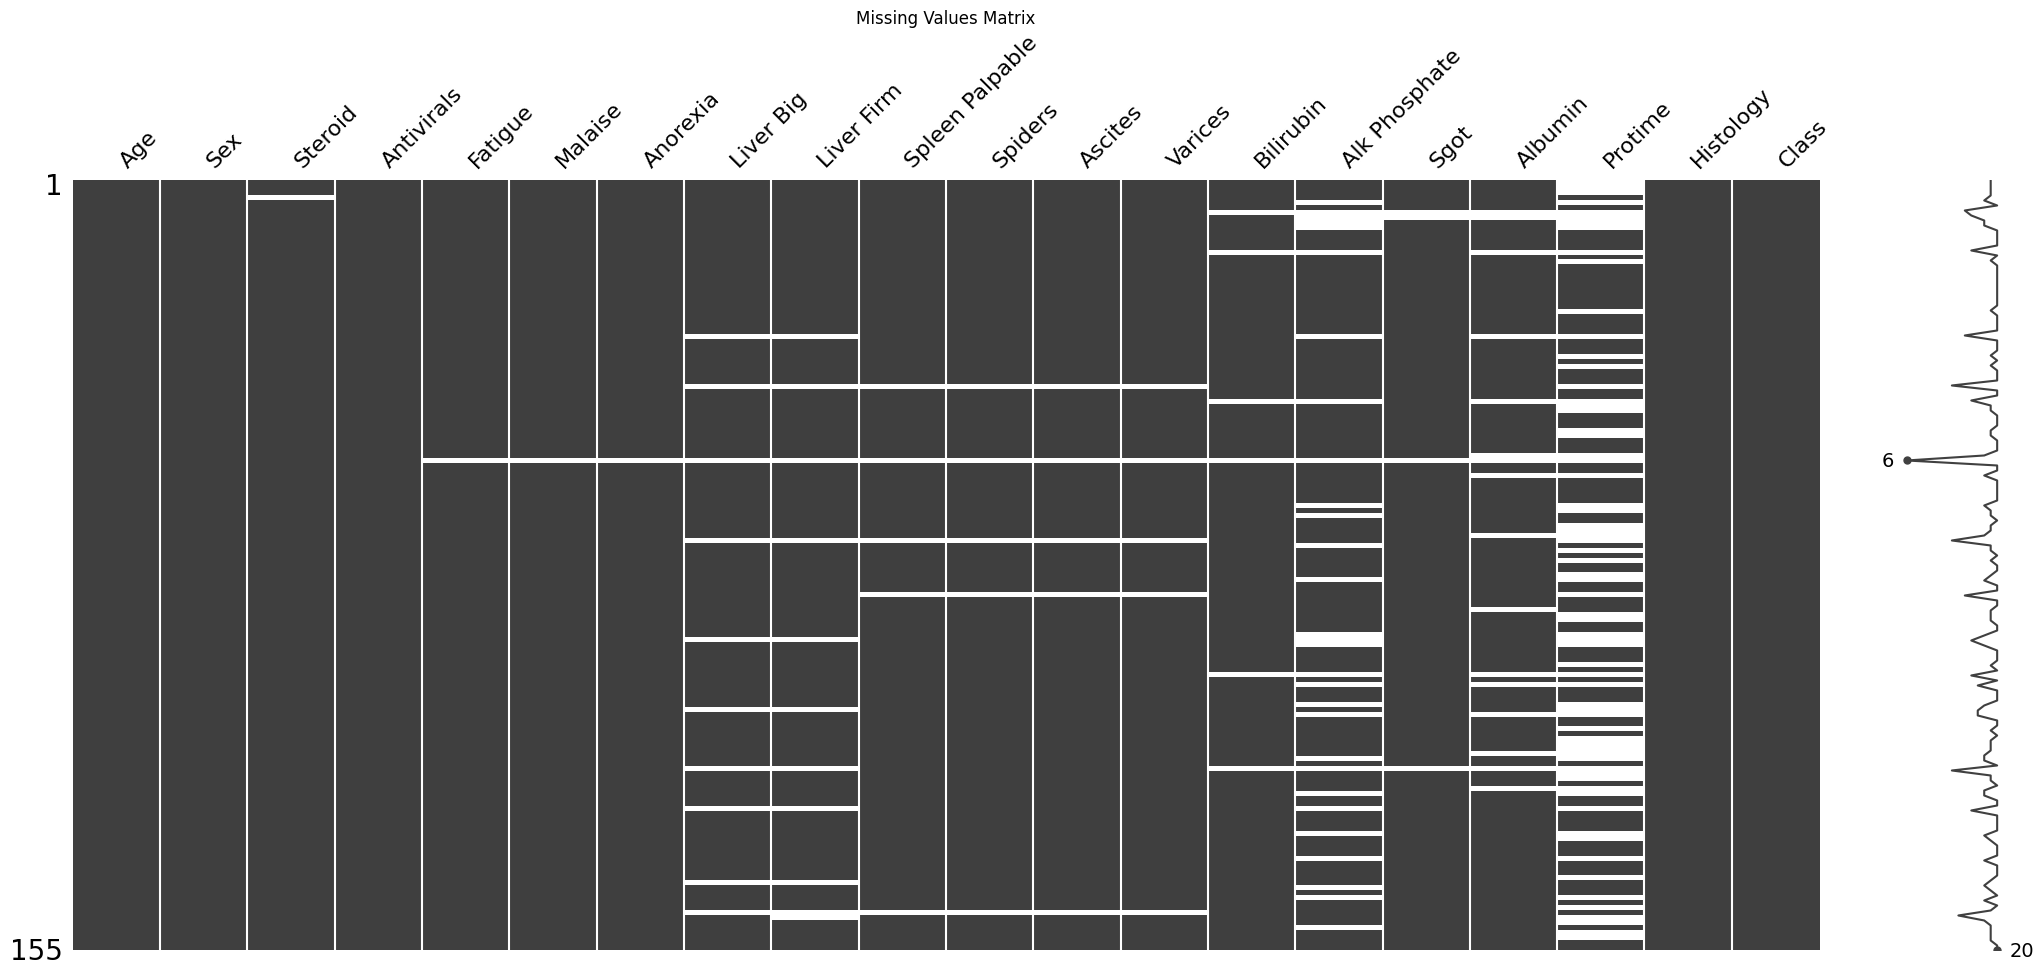

<Figure size 1000x400 with 0 Axes>

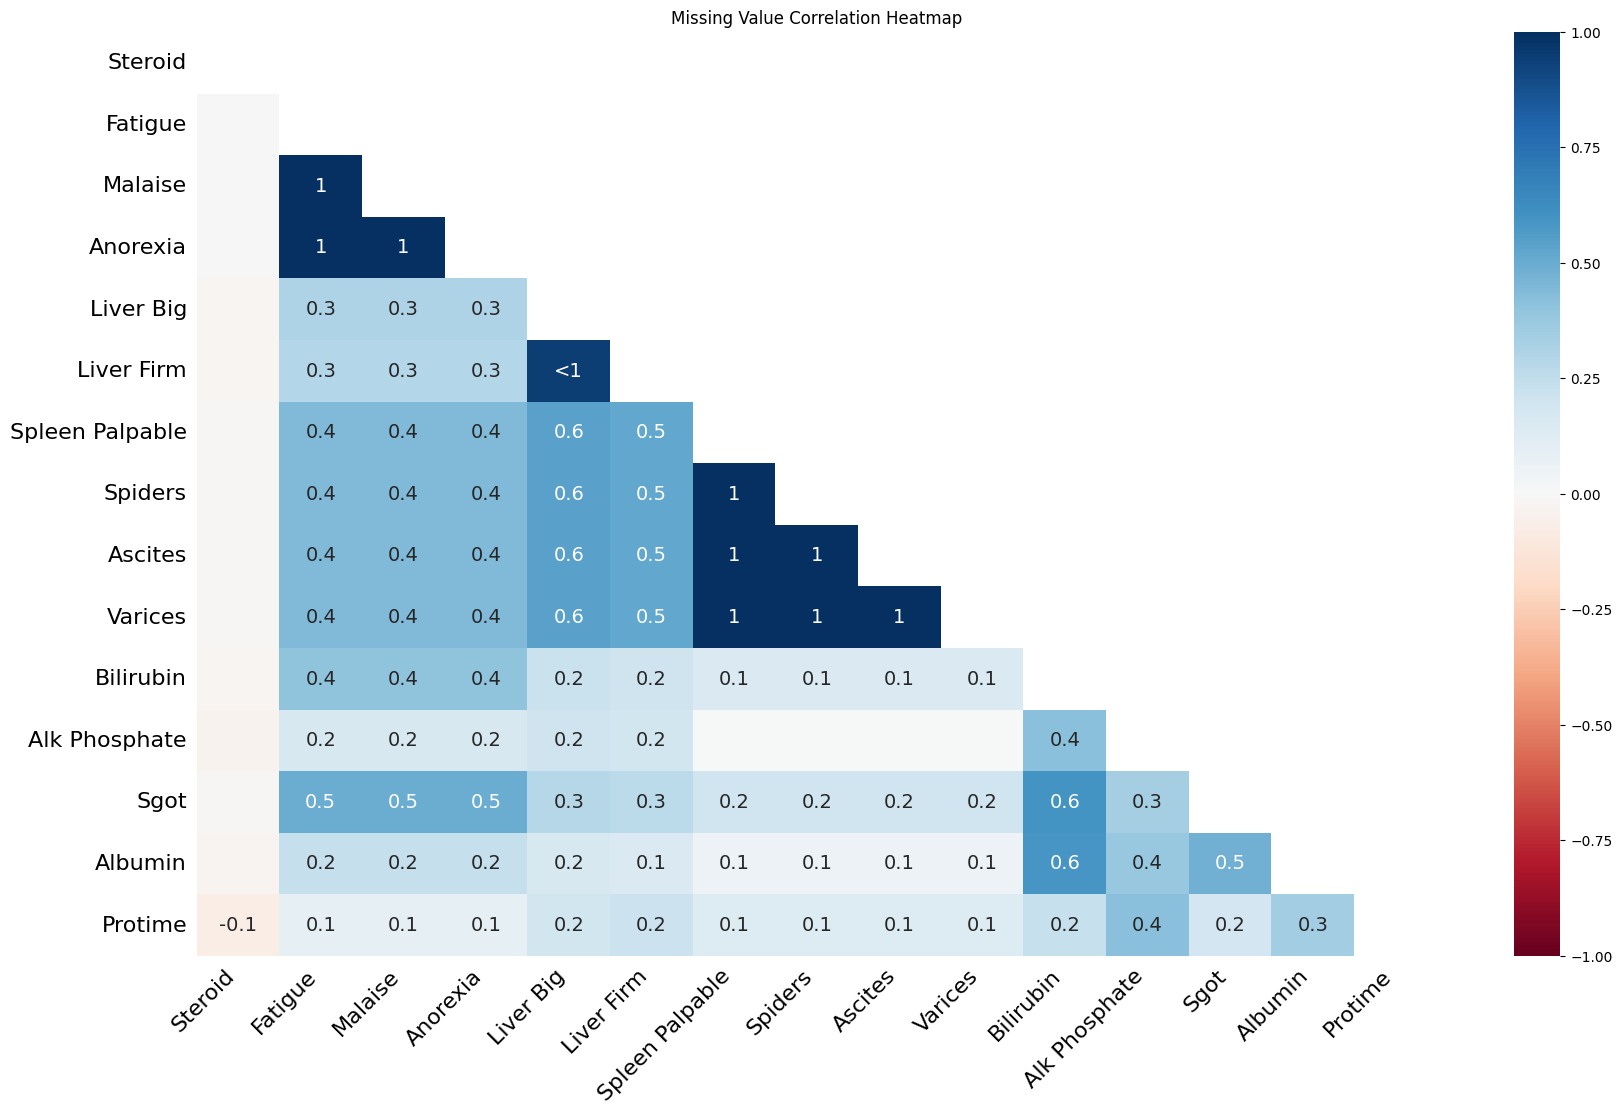

Missing Values per Column:
 Steroid             1
Fatigue             1
Malaise             1
Anorexia            1
Liver Big          10
Liver Firm         11
Spleen Palpable     5
Spiders             5
Ascites             5
Varices             5
Bilirubin           6
Alk Phosphate      29
Sgot                4
Albumin            16
Protime            67
dtype: int64


In [4]:
import missingno as msno

plt.figure(figsize=(10, 4))
msno.matrix(df)
plt.title("Missing Values Matrix")
plt.show()

plt.figure(figsize=(10, 4))
msno.heatmap(df)
plt.title("Missing Value Correlation Heatmap")
plt.show()

missing_summary = df.isnull().sum()
print("Missing Values per Column:\n", missing_summary[missing_summary > 0])


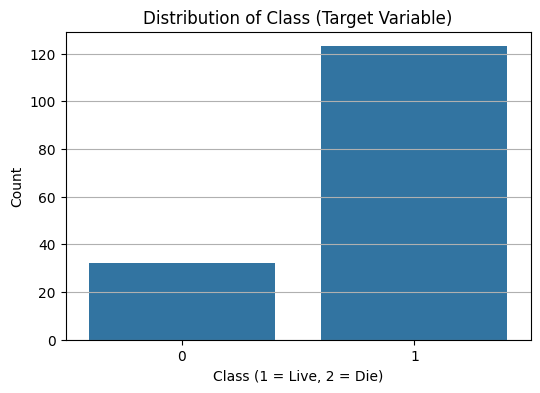

In [5]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Class')
plt.title("Distribution of Class (Target Variable)")
plt.xlabel("Class (1 = Live, 2 = Die)")
plt.ylabel("Count")
plt.grid(axis='y')
plt.show()


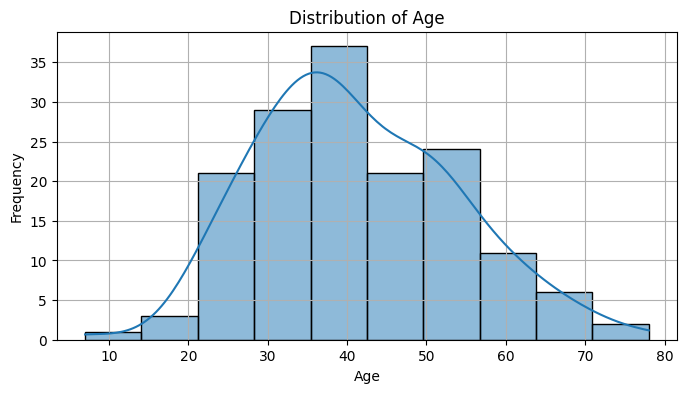

In [6]:
plt.figure(figsize=(8,4))
sns.histplot(df['Age'], kde=True, bins=10)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


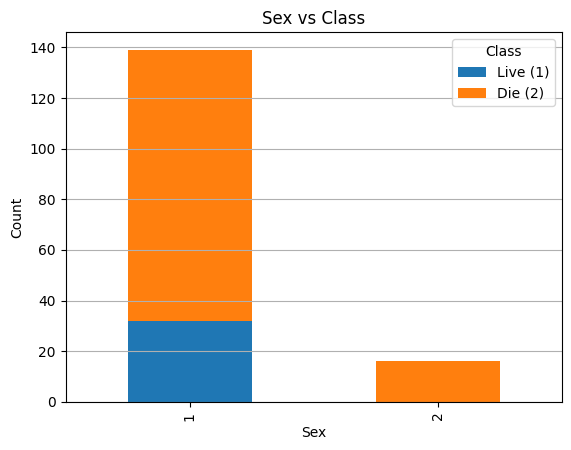

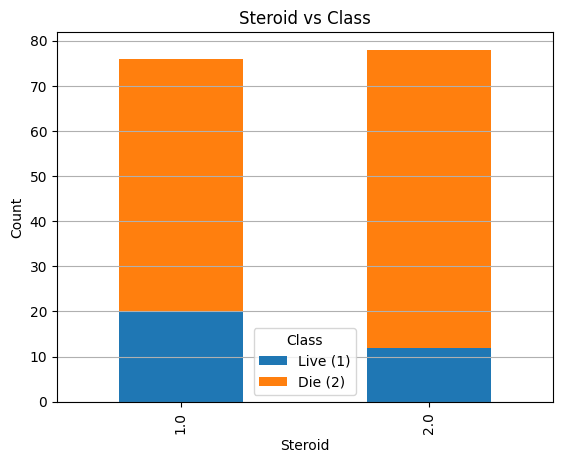

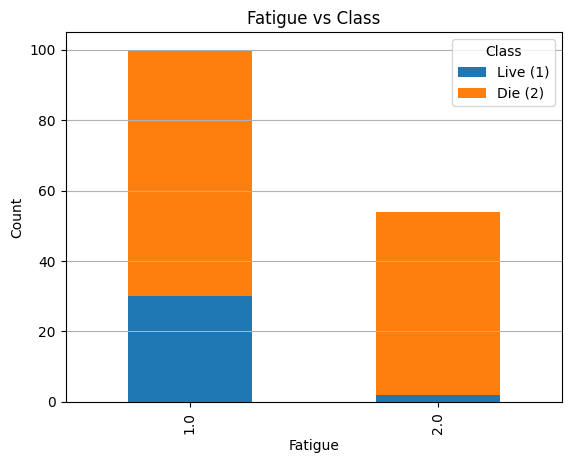

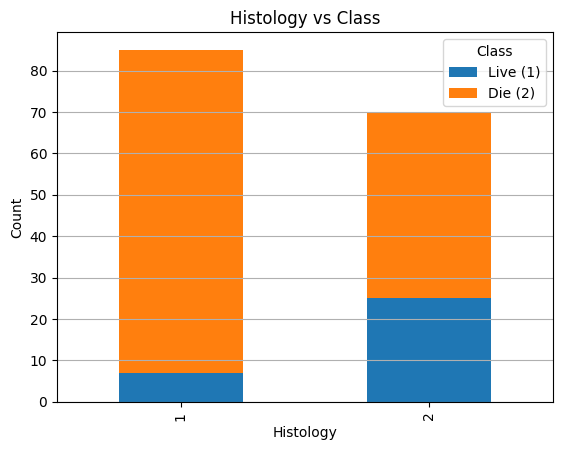

In [7]:
cat_features = ['Sex', 'Steroid', 'Fatigue', 'Histology']
for feature in cat_features:
    pd.crosstab(df[feature], df['Class']).plot(kind='bar', stacked=True)
    plt.title(f'{feature} vs Class')
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.legend(title='Class', labels=['Live (1)', 'Die (2)'])
    plt.grid(axis='y')
    plt.show()


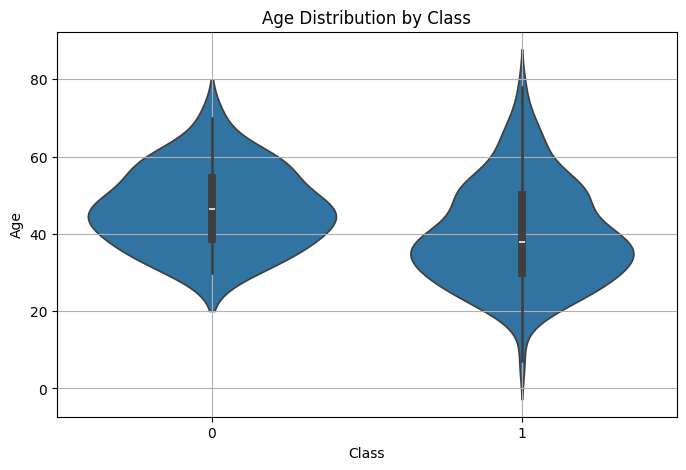

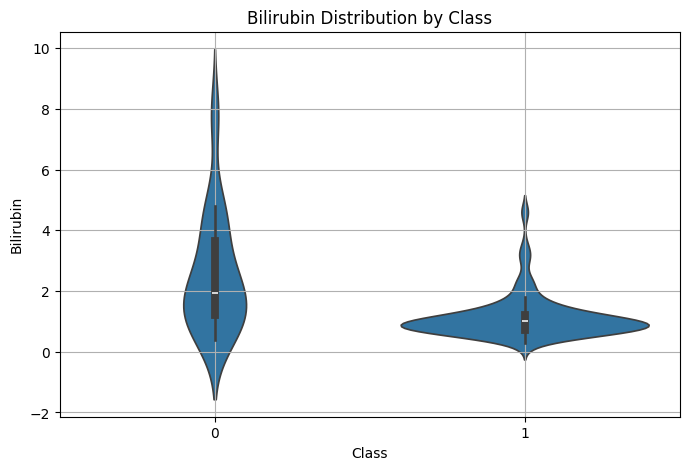

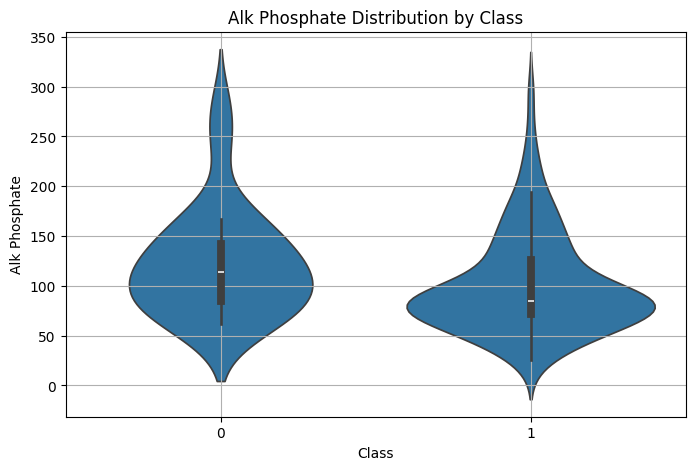

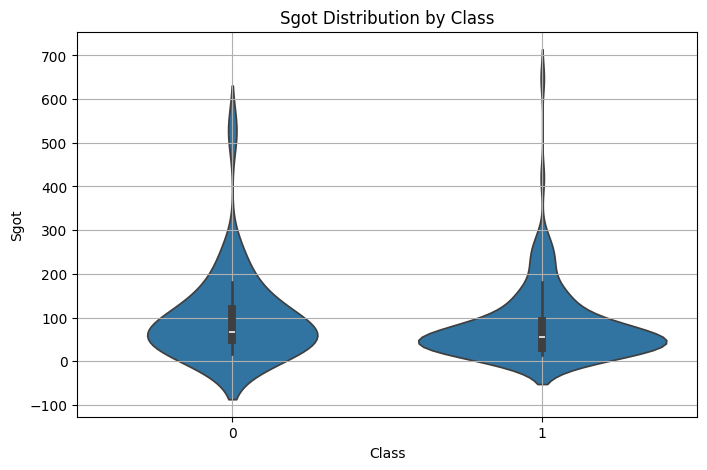

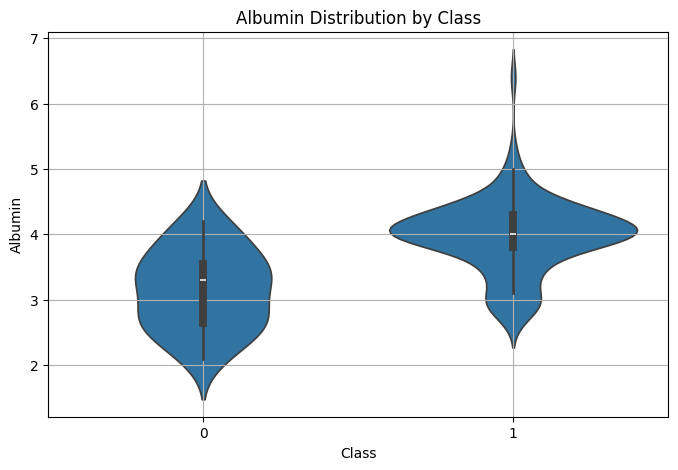

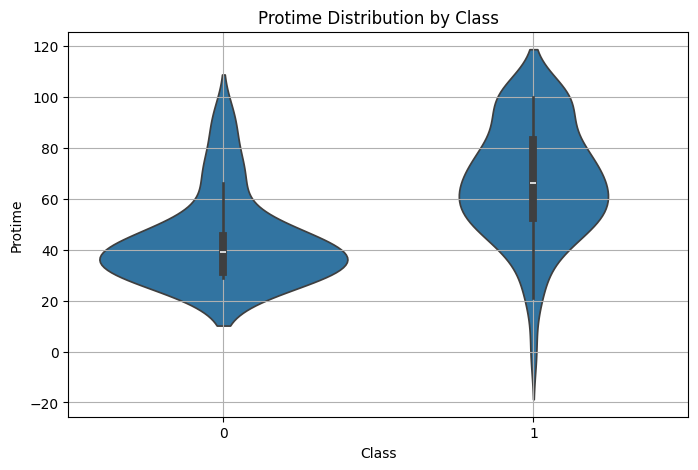

In [8]:
continuous = ['Age', 'Bilirubin', 'Alk Phosphate', 'Sgot', 'Albumin', 'Protime']
for feature in continuous:
    plt.figure(figsize=(8, 5))
    sns.violinplot(x='Class', y=feature, data=df)
    plt.title(f'{feature} Distribution by Class')
    plt.grid(True)
    plt.show()


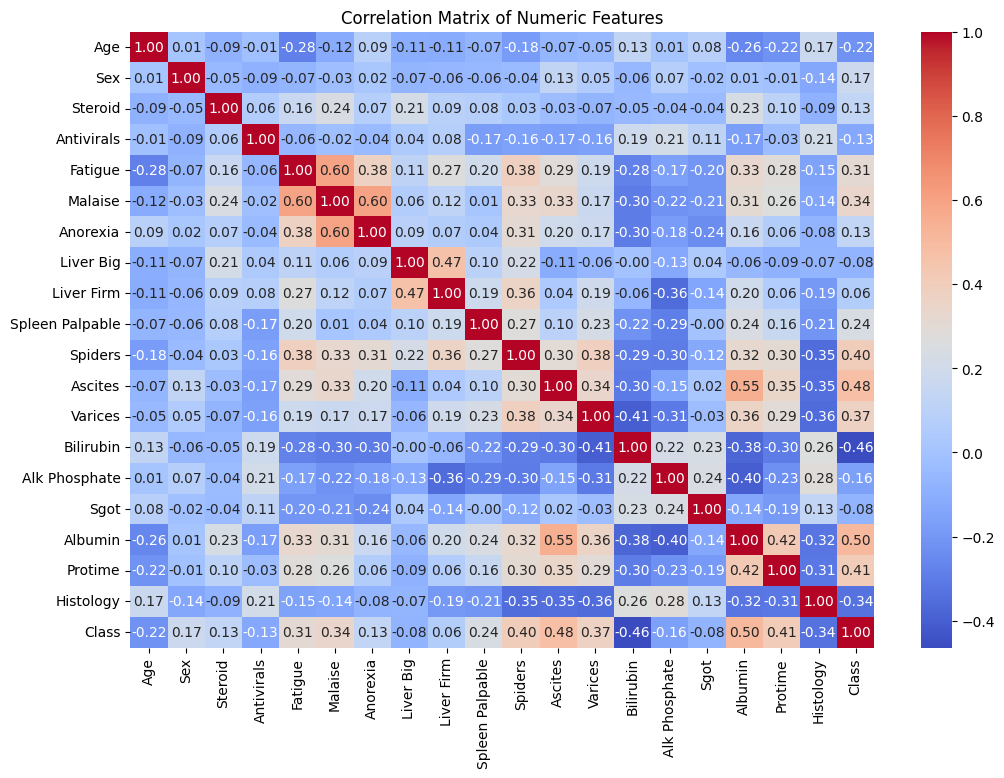

In [9]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.show()


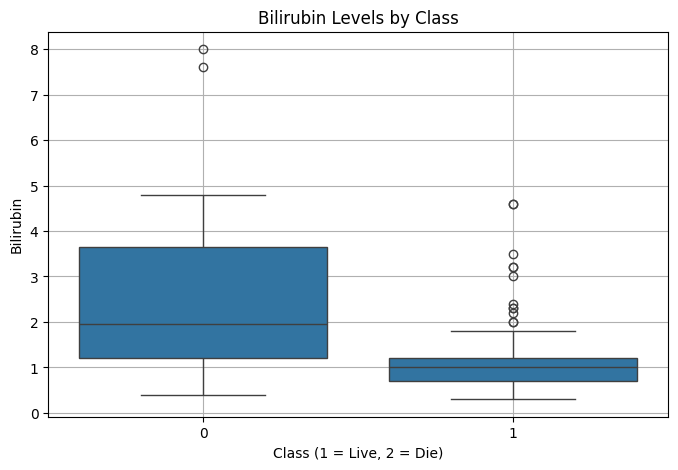

In [10]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Class', y='Bilirubin', data=df)
plt.title("Bilirubin Levels by Class")
plt.xlabel("Class (1 = Live, 2 = Die)")
plt.ylabel("Bilirubin")
plt.grid(True)
plt.show()


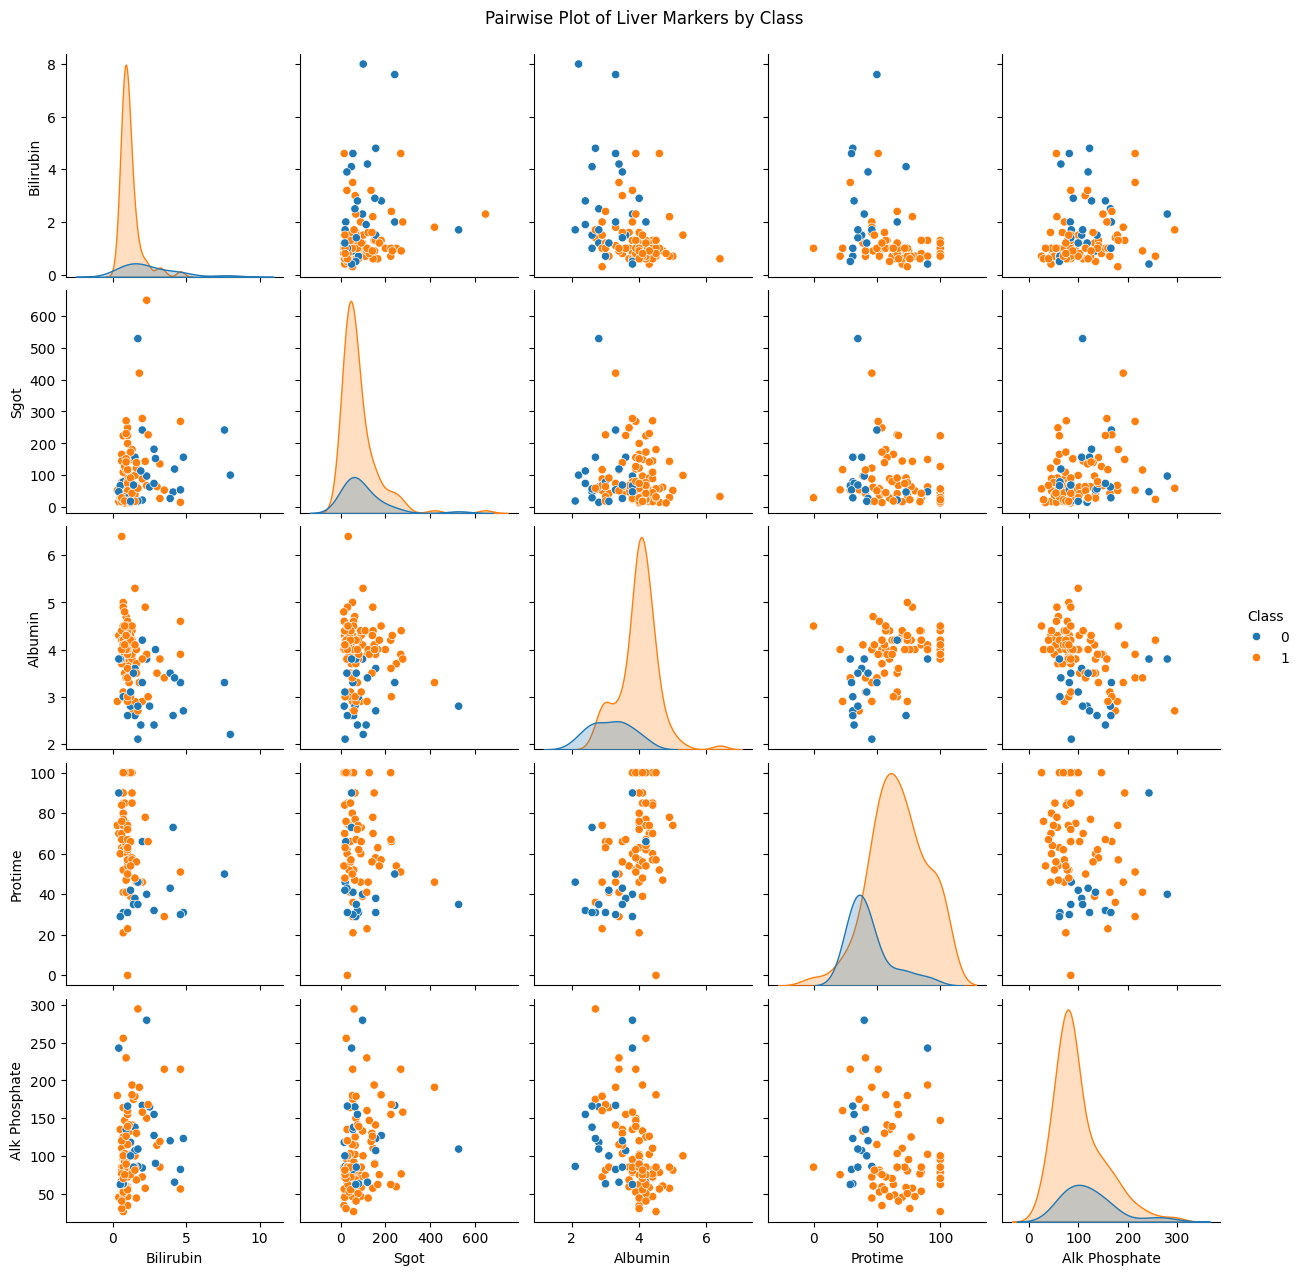

In [11]:
top_features = ['Bilirubin', 'Sgot', 'Albumin', 'Protime', 'Alk Phosphate', 'Class']
sns.pairplot(df[top_features], hue='Class', diag_kind='kde')
plt.suptitle("Pairwise Plot of Liver Markers by Class", y=1.02)
plt.show()


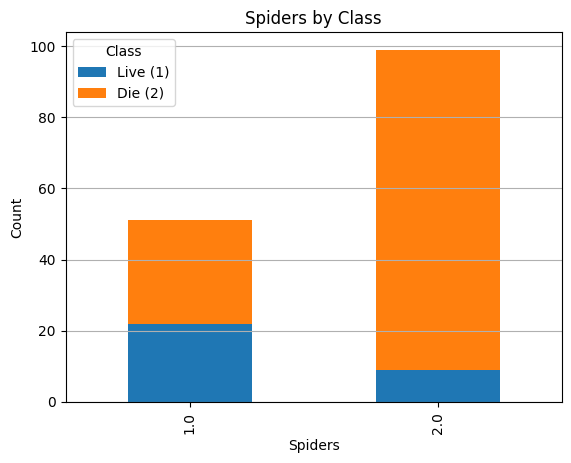

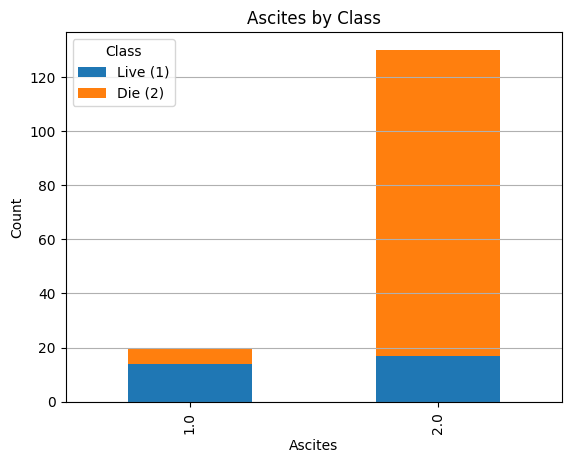

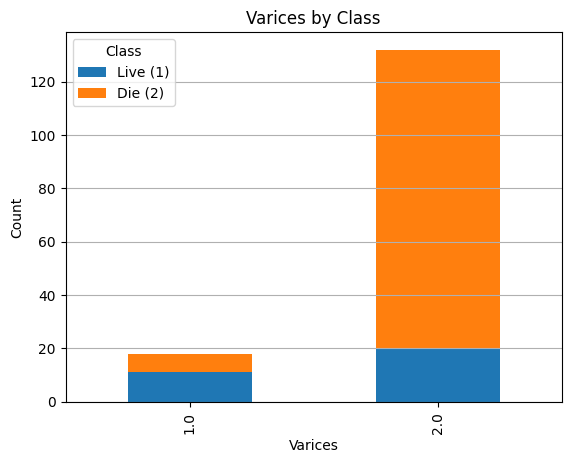

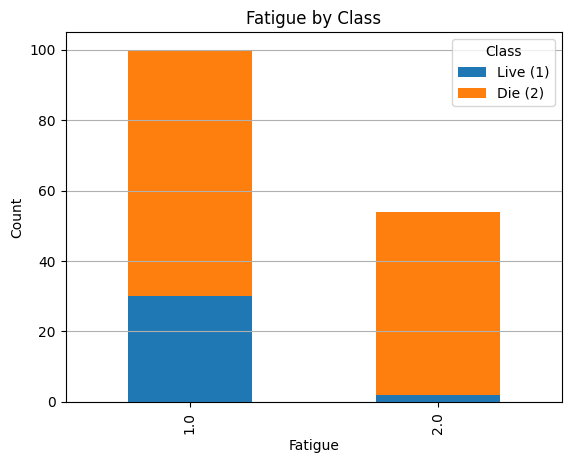

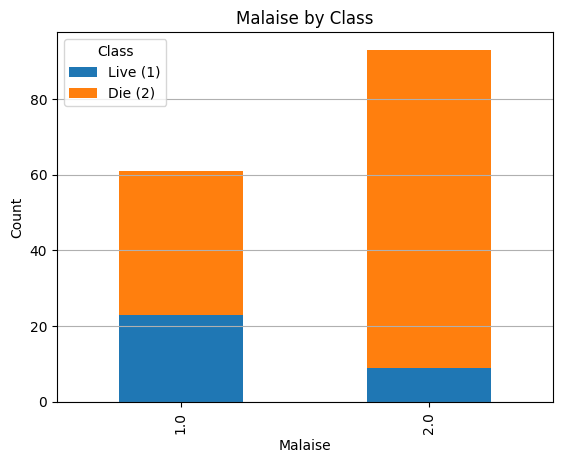

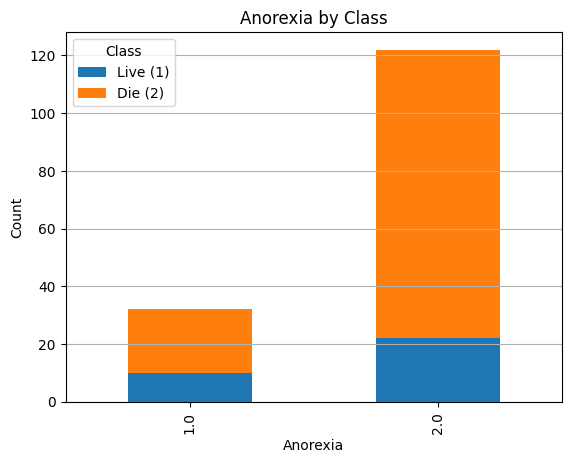

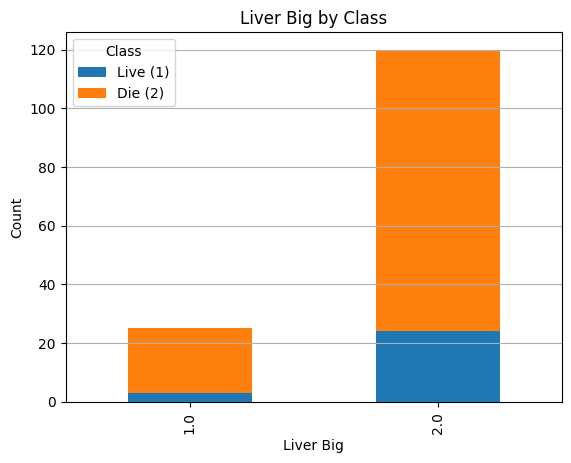

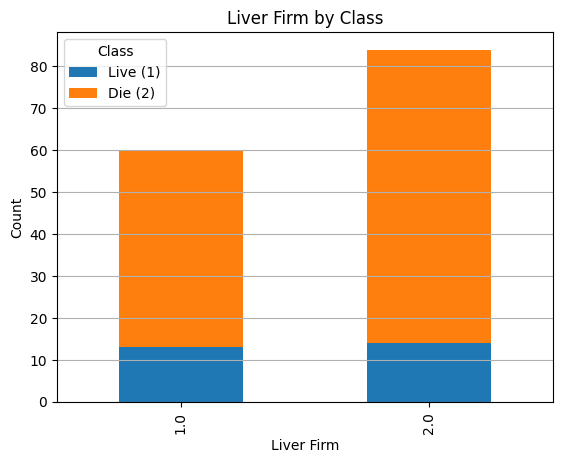

In [12]:
symptoms = ['Spiders', 'Ascites', 'Varices', 'Fatigue', 'Malaise', 'Anorexia', 'Liver Big', 'Liver Firm']
for feature in symptoms:
    cross_tab = pd.crosstab(df[feature], df['Class'])
    cross_tab.plot(kind='bar', stacked=True)
    plt.title(f'{feature} by Class')
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.legend(title='Class', labels=['Live (1)', 'Die (2)'])
    plt.grid(axis='y')
    plt.show()


## 📝 Problem Description and Proposed Approach

### Problem Overview

The dataset comes from the UCI Machine Learning Repository and contains clinical data from 155 patients with hepatitis. Each record includes information such as age, symptoms, treatment, and results from various lab tests. The key outcome we’re interested in is whether the patient survived (`Live`) or not (`Die`).

The task is to use machine learning to predict a patient’s survival based on their medical information. This type of predictive model could potentially help doctors assess risk and make better treatment decisions.

---

### Project Goal

Our goal is to build a classification model that predicts the likelihood of a patient surviving hepatitis. Since this is a medical dataset, accuracy is important, but we also care about other evaluation metrics like precision and recall — especially because incorrectly predicting that a patient will survive when they won’t is a serious error.

---

### Challenges

- The dataset is **small** — only 155 records — so we need to be careful about overfitting.
- There’s a **class imbalance**: more patients survived than died.
- Some features contain **missing values**, especially `Protime` and `Alk Phosphate`.
- The data includes both **categorical and numerical variables**, which need to be handled appropriately before training the model.

---

### Why Random Forest?

We’ll be using a **Random Forest classifier** for this task. It’s a good fit because:
- It works well with both numerical and categorical features.
- It handles missing data reasonably well.
- It’s less prone to overfitting than a single decision tree.
- It allows us to see which features are most important in making predictions.

---

### General Approach

Here’s how we’ll proceed:

1. **Explore the data** to understand distributions, missing values, and how features relate to the target.
2. **Clean and prepare** the dataset: handle missing values, encode categories, and split the data.
3. **Train the Random Forest model** on the training set.
4. **Evaluate the model** using accuracy, precision, recall, F1-score, and confusion matrix.
5. **Analyze the results** and check which features contributed most to the predictions.

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler

In [14]:
df_trimmed = df.drop(columns=['Protime']) # Drop 'Protime' due to excessive missing values

target_col = 'Class'
y = df_trimmed[target_col]
X = df_trimmed.drop(columns=[target_col])

binary_cols = [
    'Steroid', 'Fatigue', 'Malaise', 'Anorexia', 'Liver Big', 'Liver Firm',
    'Spleen Palpable', 'Spiders', 'Ascites', 'Varices'
]

numeric_cols = [
    'Age', 'Bilirubin', 'Alk Phosphate', 'Sgot', 'Albumin'
]


binary_imputer = SimpleImputer(strategy='most_frequent') # Impute binary vars with mode
X_binary_imputed = pd.DataFrame(
    binary_imputer.fit_transform(X[binary_cols]),
    columns=binary_cols
)

scaler = StandardScaler()  # Impute numeric using KNN
X_numeric_scaled = pd.DataFrame(
    scaler.fit_transform(X[numeric_cols]),
    columns=numeric_cols
)

knn_imputer = KNNImputer(n_neighbors=5)
X_numeric_imputed = pd.DataFrame(
    knn_imputer.fit_transform(X_numeric_scaled),
    columns=numeric_cols
)

X_prepared = pd.concat([X_numeric_imputed, X_binary_imputed], axis=1)
y_prepared = y.reset_index(drop=True)


In [15]:
import joblib

joblib.dump(knn_imputer, 'knn_imputer.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(binary_imputer, 'binary_imputer.pkl')

['binary_imputer.pkl']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X_prepared, y_prepared, test_size=0.2, stratify=y, random_state=42
)

In [17]:
from sklearn.ensemble import RandomForestClassifier

rf_orig = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced',  # important for handling class imbalance
)
rf_orig.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

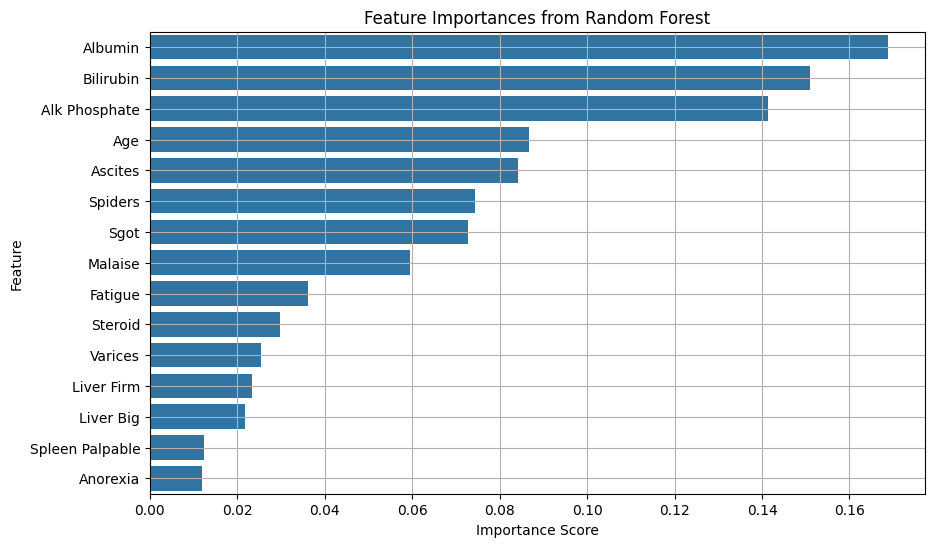

In [18]:
importances = pd.Series(rf_orig.feature_importances_, index=X_prepared.columns)
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=importances.values, y=importances.index)
plt.title('Feature Importances from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.grid(True)
plt.show()


In [19]:
from sklearn.linear_model import LogisticRegression

logreg_orig = LogisticRegression(max_iter=1000, class_weight='balanced')
logreg_orig.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000)

In [20]:
from xgboost import XGBClassifier

xgb_orig = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_orig.fit(X_train, y_train)


/Users/mikolajkahl/kahlus2001/ml-project-hepatitis/venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [21:55:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [21]:
from sklearn.metrics import classification_report, confusion_matrix

def evaluate_model(model, X_test, y_test, name="Model"):
    print(f"\n--- {name} ---")
    y_pred = model.predict(X_test)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", cm)


In [22]:
evaluate_model(rf_orig, X_test, y_test, "Random Forest (Original)")
evaluate_model(logreg_orig, X_test, y_test, "Logistic Regression (Original)")
evaluate_model(xgb_orig, X_test, y_test, "XGBoost (Original)")



--- Random Forest (Original) ---
Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.33      0.36         6
           1       0.85      0.88      0.86        25

    accuracy                           0.77        31
   macro avg       0.62      0.61      0.61        31
weighted avg       0.76      0.77      0.77        31

Confusion Matrix:
 [[ 2  4]
 [ 3 22]]

--- Logistic Regression (Original) ---
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.67      0.57         6
           1       0.91      0.84      0.88        25

    accuracy                           0.81        31
   macro avg       0.71      0.75      0.72        31
weighted avg       0.83      0.81      0.82        31

Confusion Matrix:
 [[ 4  2]
 [ 4 21]]

--- XGBoost (Original) ---
Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.33      0.36 

### Synthetically balance the imbalances

In [23]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_prepared, y_prepared)

from collections import Counter
print("Balanced class distribution:", Counter(y_balanced))

Balanced class distribution: Counter({1: 123, 0: 123})


In [24]:
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(
    X_balanced, y_balanced, test_size=0.2, stratify=y_balanced, random_state=42
)

In [25]:
rf_bal = RandomForestClassifier(random_state=42)
rf_bal.fit(X_train_bal, y_train_bal)


RandomForestClassifier(random_state=42)

In [26]:
logreg_bal = LogisticRegression(max_iter=1000)
logreg_bal.fit(X_train_bal, y_train_bal)


LogisticRegression(max_iter=1000)

In [27]:
xgb_bal = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_bal.fit(X_train_bal, y_train_bal)


/Users/mikolajkahl/kahlus2001/ml-project-hepatitis/venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [21:55:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [28]:
evaluate_model(rf_bal, X_test_bal, y_test_bal, "Random Forest (Balanced)")
evaluate_model(logreg_bal, X_test_bal, y_test_bal, "Logistic Regression (Balanced)")
evaluate_model(xgb_bal, X_test_bal, y_test_bal, "XGBoost (Balanced)")



--- Random Forest (Balanced) ---
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.84      0.86        25
           1       0.85      0.88      0.86        25

    accuracy                           0.86        50
   macro avg       0.86      0.86      0.86        50
weighted avg       0.86      0.86      0.86        50

Confusion Matrix:
 [[21  4]
 [ 3 22]]

--- Logistic Regression (Balanced) ---
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.76      0.83        25
           1       0.79      0.92      0.85        25

    accuracy                           0.84        50
   macro avg       0.85      0.84      0.84        50
weighted avg       0.85      0.84      0.84        50

Confusion Matrix:
 [[19  6]
 [ 2 23]]

--- XGBoost (Balanced) ---
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.84      0.88 

In [29]:
from sklearn.metrics import accuracy_score, recall_score, f1_score

def get_metrics(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)
    
    # Handle binary confusion matrix format
    if cm.shape == (2, 2):
        tn, fp, fn, tp = cm.ravel()
    else:
        tn = fp = fn = tp = 0

    recall_0 = recall_score(y_true, y_pred, pos_label=0)
    f1_0 = f1_score(y_true, y_pred, pos_label=0)

    return {
        "accuracy": acc,
        "TP": tp,
        "FP": fp,
        "TN": tn,
        "FN": fn,
        "recall_0": recall_0,
        "f1_0": f1_0
    }

results = {}

results['Random Forest (Original)'] = get_metrics(y_test, rf_orig.predict(X_test))
results['Logistic Regression (Original)'] = get_metrics(y_test, logreg_orig.predict(X_test))
results['XGBoost (Original)'] = get_metrics(y_test, xgb_orig.predict(X_test))

results['Random Forest (Balanced)'] = get_metrics(y_test_bal, rf_bal.predict(X_test_bal))
results['Logistic Regression (Balanced)'] = get_metrics(y_test_bal, logreg_bal.predict(X_test_bal))
results['XGBoost (Balanced)'] = get_metrics(y_test_bal, xgb_bal.predict(X_test_bal))

summary_df = pd.DataFrame(results).T
summary_df = summary_df[["accuracy", "TP", "FP", "TN", "FN", "recall_0", "f1_0"]]
summary_df.columns = ["Accuracy", "TP", "FP", "TN", "FN", "Recall (Live)", "F1 (Live)"]

pd.set_option('display.float_format', '{:.2f}'.format)
print(summary_df)


                                Accuracy    TP   FP    TN   FN  Recall (Live)  \
Random Forest (Original)            0.77 22.00 4.00  2.00 3.00           0.33   
Logistic Regression (Original)      0.81 21.00 2.00  4.00 4.00           0.67   
XGBoost (Original)                  0.77 22.00 4.00  2.00 3.00           0.33   
Random Forest (Balanced)            0.86 22.00 4.00 21.00 3.00           0.84   
Logistic Regression (Balanced)      0.84 23.00 6.00 19.00 2.00           0.76   
XGBoost (Balanced)                  0.88 23.00 4.00 21.00 2.00           0.84   

                                F1 (Live)  
Random Forest (Original)             0.36  
Logistic Regression (Original)       0.57  
XGBoost (Original)                   0.36  
Random Forest (Balanced)             0.86  
Logistic Regression (Balanced)       0.83  
XGBoost (Balanced)                   0.88  
